In [4]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
from yahoo_finance import Share
from googlefinance import getQuotes
import urllib.request as urlopen
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns
mpl.rcParams['figure.figsize'] = (14, 8)
today = str(datetime.datetime.now().date())
#mpl.rc("figure.figsize",(14,8))

In [215]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)    
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=tableau20) 
plt.rc('grid', linestyle="--", color='black',alpha = 0.5)

In [257]:
Quote = 'TOBII.ST'
yahoo = Share(Quote)
hist_data = yahoo.get_historical('2014-01-01', today)

#CHECK IF DATA EXISTS
hist_data[-1]

{'Adj_Close': '34.50',
 'Close': '34.50',
 'Date': '2015-04-24',
 'High': '40.00',
 'Low': '32.50',
 'Open': '38.00',
 'Symbol': 'TOBII.ST',
 'Volume': '9614900'}

In [258]:
df = pd.DataFrame(hist_data)
df['Date'] = pd.to_datetime(df.Date)
df = df.groupby(['Date']).sum()
df = df.loc[:, df.columns != 'Symbol'].astype(float)
#df.columns = df.columns.swaplevel(0, 1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480 entries, 2015-04-24 to 2017-02-24
Data columns (total 6 columns):
Adj_Close    480 non-null float64
Close        480 non-null float64
High         480 non-null float64
Low          480 non-null float64
Open         480 non-null float64
Volume       480 non-null float64
dtypes: float64(6)
memory usage: 26.2 KB


Adj_Close  Close  High   Low  Open     Volume
Date                                                     
2015-04-24       34.5   34.5  40.0  32.5  38.0  9614900.0
2015-04-27       39.0   39.0  39.4  34.7  35.0  2337200.0
2015-04-28       38.8   38.8  40.7  38.1  39.9  1391800.0
2015-04-29       38.0   38.0  39.3  36.6  39.3   887700.0
2015-04-30       36.6   36.6  38.3  36.6  38.1   379400.0

In [259]:
#PCT CHANGE
df['pct_open_close_change'] = (df['Close']/df['Open']-1)*100
df['pct_low_high_change'] = (df['High']/df['Low']-1)*100
df['pct_open_high_change'] = (df['High']/df['Open']-1)*100
df['pct_close_open_change'] = (df['Open']/df['Close'].shift(periods=1)-1)*100
df['pct_close_close_change'] = (df['Close']/df['Close'].shift(periods=1)-1)*100
df['pct_open_close_change_yesterday'] = (df['Open'].shift(periods=1)/df['Close'].shift(periods=1)-1)*100
#ROLLING
df['rolling_20'] = df['Close'].rolling(window = 20).mean()
df['rolling_40'] = df['Close'].rolling(window = 40).mean()
df['rolling_80'] = df['Close'].rolling(window = 80).mean()
df['rolling_160'] = df['Close'].rolling(window = 160).mean()
#OTHER
df['over_under'] = (df['Close']/df['rolling_20']-1)*100
df['upday'] = df['pct_open_close_change']>0.01
df['pct_open_close_change_round'] = df['pct_open_close_change'].round()
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
#df['pct_change_incl_close_change'] = (df['Close']/df['close-1']-1)*100
df.head(5)

Adj_Close  Close  High   Low  Open     Volume  \
Date                                                        
2015-04-24       34.5   34.5  40.0  32.5  38.0  9614900.0   
2015-04-27       39.0   39.0  39.4  34.7  35.0  2337200.0   
2015-04-28       38.8   38.8  40.7  38.1  39.9  1391800.0   
2015-04-29       38.0   38.0  39.3  36.6  39.3   887700.0   
2015-04-30       36.6   36.6  38.3  36.6  38.1   379400.0   

            pct_open_close_change  pct_low_high_change  pct_open_high_change  \
Date                                                                           
2015-04-24              -9.210526            23.076923              5.263158   
2015-04-27              11.428571            13.544669             12.571429   
2015-04-28              -2.756892             6.824147              2.005013   
2015-04-29              -3.307888             7.377049              0.000000   
2015-04-30              -3.937008             4.644809              0.524934   

            pct_close_open_change  pct_close_close_change  \
Date                                                        
2015-04-24                    NaN                     NaN   
2015-04-27               1.449275               13.043478   
2015-04-28               2.307692               -0.512821   
2015-04-29               1.288660               -2.061856   
2015-04-30               0.263158               -3.684211   

            pct_open_close_change_yesterday  rolling_20  rolling_40  \
Date                                                                  
2015-04-24                              NaN         NaN         NaN   
2015-04-27                        10.144928         NaN         NaN   
2015-04-28                       -10.256410         NaN         NaN   
2015-04-29                         2.835052         NaN         NaN   
2015-04-30                         3.421053         NaN         NaN   

            rolling_80  rolling_160  over_under  upday  \
Date                                                     
2015-04-24         NaN          NaN         NaN  False   
2015-04-27         NaN          NaN         NaN   True   
2015-04-28         NaN          NaN         NaN  False   
2015-04-29         NaN          NaN         NaN  False   
2015-04-30         NaN          NaN         NaN  False   

            pct_open_close_change_round is_train  
Date                                              
2015-04-24                         -9.0     True  
2015-04-27                         11.0    False  
2015-04-28                         -3.0    False  
2015-04-29                         -3.0     True  
2015-04-30                         -4.0    False

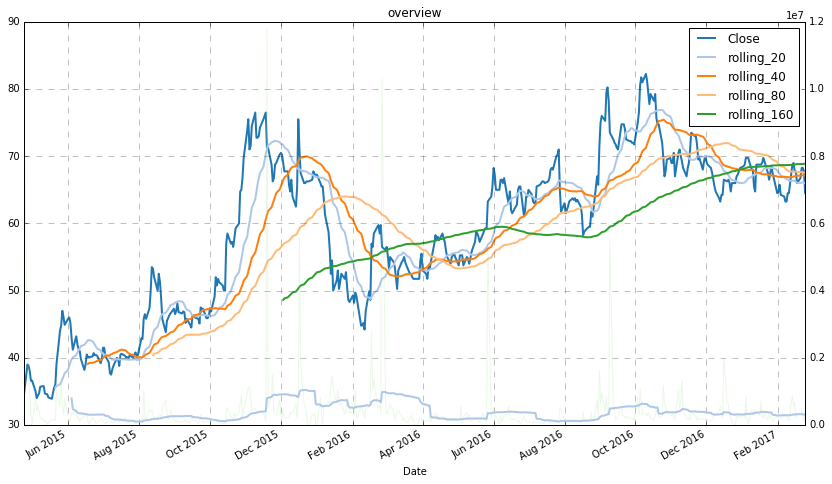

In [262]:
f, ax = plt.subplots(1,1)
df[['Close','rolling_20','rolling_40','rolling_80','rolling_160']].plot(ax=ax, lw=2,title='overview')
df['Volume'].plot(ax=ax,lw=1,ls='-',alpha=0.2,secondary_y=True)
df['Volume'].rolling(30).mean().plot(ax=ax,lw=2,ls='-',alpha=1,secondary_y=True,color=tableau20[1])
ax.grid(True)

In [265]:
# Add number of negative days
df['neg_days'] = np.nan
df['pos_days'] = np.nan
neg_days = 0
pos_days = 0
for index, row in df.iterrows():
    df.set_value(index,'neg_days',neg_days)
    df.set_value(index,'pos_days',pos_days)
    if row['pct_close_close_change']<0:
        neg_days = neg_days+1
        pos_days = 0
    elif row['pct_close_close_change']>0:
        pos_days = pos_days+1
        neg_days = 0
    else:
        neg_days = 0
        pos_days = 0
df.head()

Adj_Close  Close  High   Low  Open     Volume  \
Date                                                        
2015-04-24       34.5   34.5  40.0  32.5  38.0  9614900.0   
2015-04-27       39.0   39.0  39.4  34.7  35.0  2337200.0   
2015-04-28       38.8   38.8  40.7  38.1  39.9  1391800.0   
2015-04-29       38.0   38.0  39.3  36.6  39.3   887700.0   
2015-04-30       36.6   36.6  38.3  36.6  38.1   379400.0   

            pct_open_close_change  pct_low_high_change  pct_open_high_change  \
Date                                                                           
2015-04-24              -9.210526            23.076923              5.263158   
2015-04-27              11.428571            13.544669             12.571429   
2015-04-28              -2.756892             6.824147              2.005013   
2015-04-29              -3.307888             7.377049              0.000000   
2015-04-30              -3.937008             4.644809              0.524934   

            pct_close_open_change   ...     rolling_20  rolling_40  \
Date                                ...                              
2015-04-24                    NaN   ...            NaN         NaN   
2015-04-27               1.449275   ...            NaN         NaN   
2015-04-28               2.307692   ...            NaN         NaN   
2015-04-29               1.288660   ...            NaN         NaN   
2015-04-30               0.263158   ...            NaN         NaN   

            rolling_80  rolling_160  over_under  upday  \
Date                                                     
2015-04-24         NaN          NaN         NaN  False   
2015-04-27         NaN          NaN         NaN   True   
2015-04-28         NaN          NaN         NaN  False   
2015-04-29         NaN          NaN         NaN  False   
2015-04-30         NaN          NaN         NaN  False   

            pct_open_close_change_round is_train  neg_days pos_days  
Date                                                                 
2015-04-24                         -9.0     True       0.0      0.0  
2015-04-27                         11.0    False       0.0      0.0  
2015-04-28                         -3.0    False       0.0      1.0  
2015-04-29                         -3.0     True       1.0      0.0  
2015-04-30                         -4.0    False       2.0      0.0  

[5 rows x 22 columns]

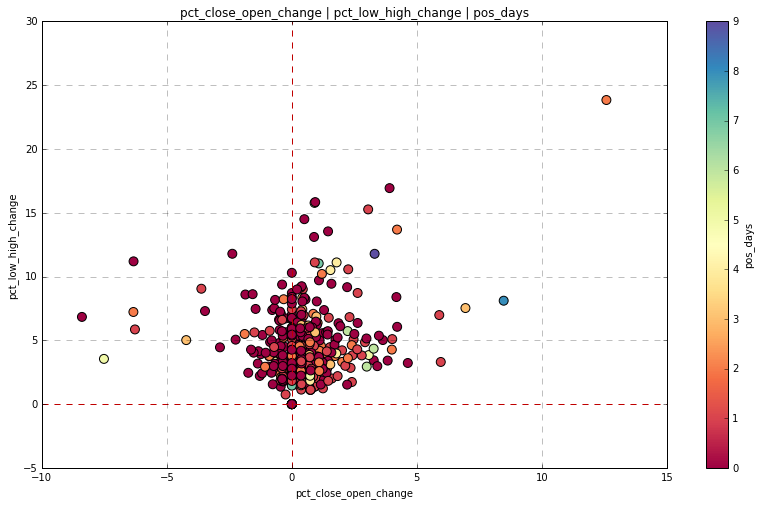

In [266]:
# CLose price change dependancy
f, ax = plt.subplots(1,1)
cmap = mpl.cm.get_cmap('Spectral')
x = 'pct_close_open_change'
y = 'pct_low_high_change'
c = 'pos_days'
df[abs(df['pct_close_open_change'])<40].plot(ax=ax,kind='scatter',x=x,y=y,c=c,grid=True,s=80,cmap=cmap,title=x+' | '+y+' | '+c)
ax.axhline(0,ls = '--',color='red')
ax.axvline(0,ls = '--',color='red')

### Doji

In [232]:
def doji(open,close,high,low):
    delta = 0.001
    d_t = 0.003
    lld_t = 0.01
    gd_t = 0.02
    dd_t = 0.02
    if (close<=open*(1+delta)) & (close>=open*(1-delta)) & (high>=(1+lld_t)*open) & (low<=(1-lld_t)*close):
        print('LONG LEGGED DOJI!')
        return 'll_doji'
    elif (close<=open*(1+delta)) & (close>=open*(1-delta)) & (high>=(1+d_t)*open) & (low<=(1-d_t)*close):
        print('DOJI!')
        return 'doji'
    elif (close<=open*(1+delta)) & (close>=open*(1-delta)) & (high>=(1+gd_t)*open) & (low<=(1+delta)*close) & (low>=(1-delta)*close):
        print('GRAVESTONE DOJI!')
        return 'g_doji'
    elif (close<=open*(1+delta)) & (close>=open*(1-delta)) & (low<=(1-dd_t)*open) & (high<=(1+delta)*close) & (high>=(1-delta)*close):
        print('DRAGONFLY DOJI!')
        return 'd_doji'
    else:
        return 'no_doji'

In [233]:
df.head()

Adj_Close    Close     High      Low     Open    Volume  \
Date                                                                  
2014-01-01    30.3962  30.3962  30.3962  30.3962  30.3962       0.0   
2014-01-02    30.6233  30.6233  30.9089  30.3230  30.7038  753300.0   
2014-01-03    30.5427  30.5427  30.7991  30.3450  30.6306  463900.0   
2014-01-06    30.5427  30.5427  30.5427  30.5427  30.5427       0.0   
2014-01-07    30.3230  30.3230  30.7112  30.3230  30.6892  502100.0   

            pct_open_close_change  pct_low_high_change  pct_open_high_change  \
Date                                                                           
2014-01-01               0.000000             0.000000              0.000000   
2014-01-02              -0.262183             1.932197              0.667995   
2014-01-03              -0.286968             1.496457              0.550103   
2014-01-06               0.000000             0.000000              0.000000   
2014-01-07              -1.193254             1.280216              0.071686   

            pct_close_open_change  pct_close_close_change  \
Date                                                        
2014-01-01                    NaN                     NaN   
2014-01-02               1.011969                0.747133   
2014-01-03               0.023838               -0.263198   
2014-01-06               0.000000                0.000000   
2014-01-07               0.479656               -0.719321   

            pct_open_close_change_yesterday  rolling_20  rolling_40  \
Date                                                                  
2014-01-01                              NaN         NaN         NaN   
2014-01-02                         0.000000         NaN         NaN   
2014-01-03                         0.262872         NaN         NaN   
2014-01-06                         0.287794         NaN         NaN   
2014-01-07                         0.000000         NaN         NaN   

            over_under  upday  pct_open_close_change_round is_train  neg_days  \
Date                                                                            
2014-01-01         NaN  False                          0.0     True       0.0   
2014-01-02         NaN  False                         -0.0     True       0.0   
2014-01-03         NaN  False                         -0.0     True       0.0   
2014-01-06         NaN  False                          0.0     True       1.0   
2014-01-07         NaN  False                         -1.0     True       0.0   

            pos_days  
Date                  
2014-01-01       0.0  
2014-01-02       0.0  
2014-01-03       1.0  
2014-01-06       0.0  
2014-01-07       0.0

In [234]:
df['doji'] = df.apply(lambda row: doji(row['Open'],row['Close'],row['High'],row['Low']), axis = 1)
df.head()

DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
LONG LEGGED DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
DOJI!
LONG LEGGED DOJI!
DOJI!
LONG LEGGED DOJI!
DOJI!
DOJI!
LONG LEGGED DOJI!
LONG LEGGED DOJI!


Adj_Close    Close     High      Low     Open    Volume  \
Date                                                                  
2014-01-01    30.3962  30.3962  30.3962  30.3962  30.3962       0.0   
2014-01-02    30.6233  30.6233  30.9089  30.3230  30.7038  753300.0   
2014-01-03    30.5427  30.5427  30.7991  30.3450  30.6306  463900.0   
2014-01-06    30.5427  30.5427  30.5427  30.5427  30.5427       0.0   
2014-01-07    30.3230  30.3230  30.7112  30.3230  30.6892  502100.0   

            pct_open_close_change  pct_low_high_change  pct_open_high_change  \
Date                                                                           
2014-01-01               0.000000             0.000000              0.000000   
2014-01-02              -0.262183             1.932197              0.667995   
2014-01-03              -0.286968             1.496457              0.550103   
2014-01-06               0.000000             0.000000              0.000000   
2014-01-07              -1.193254             1.280216              0.071686   

            pct_close_open_change   ...     pct_open_close_change_yesterday  \
Date                                ...                                       
2014-01-01                    NaN   ...                                 NaN   
2014-01-02               1.011969   ...                            0.000000   
2014-01-03               0.023838   ...                            0.262872   
2014-01-06               0.000000   ...                            0.287794   
2014-01-07               0.479656   ...                            0.000000   

            rolling_20  rolling_40  over_under  upday  \
Date                                                    
2014-01-01         NaN         NaN         NaN  False   
2014-01-02         NaN         NaN         NaN  False   
2014-01-03         NaN         NaN         NaN  False   
2014-01-06         NaN         NaN         NaN  False   
2014-01-07         NaN         NaN         NaN  False   

           pct_open_close_change_round  is_train neg_days  pos_days     doji  
Date                                                                          
2014-01-01                         0.0      True      0.0       0.0  no_doji  
2014-01-02                        -0.0      True      0.0       0.0  no_doji  
2014-01-03                        -0.0      True      0.0       1.0  no_doji  
2014-01-06                         0.0      True      1.0       0.0  no_doji  
2014-01-07                        -1.0      True      0.0       0.0  no_doji  

[5 rows x 21 columns]

In [235]:
df_doji = df['doji'][df['doji']!='no_doji'].reset_index()
#df_doji = df_doji.reset_index(level=1).rename(columns={'dt':'date'}).reset_index().rename(columns={'dt':'time'})
df_doji.head()

Date  doji
0 2014-01-13  doji
1 2014-02-18  doji
2 2014-02-27  doji
3 2014-03-20  doji
4 2014-03-25  doji

In [236]:
#df['High'].loc[row['Date']]

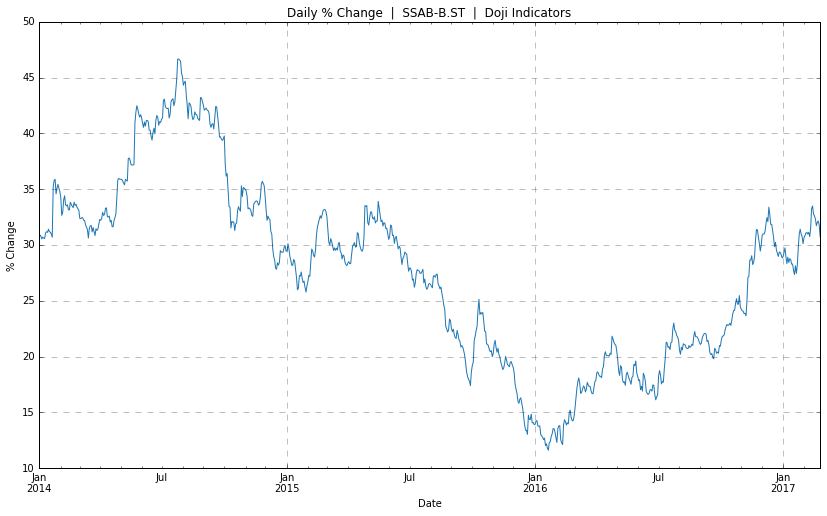

In [237]:
fig, ax = plt.subplots(1,1)
#df_daily_norm.loc[:,'high'].plot(ax = ax,legend=False,grid='on',title='Daily % Change  |  '+str(Quote))
ax.set_xlabel('Time')
ax.set_ylabel('% Change')
#print(df_daily_norm[df_doji[0,'time']])
df['High'].plot(ax=ax,legend=False,grid='on',title='Daily % Change  |  '+str(Quote)+'  |  Doji Indicators')
for index, row in df_doji.iterrows():
    ax.plot(row['Date'], df['High'].loc[row['Date']], 'o')
    #ax.text(row['Date'], df['High'].loc[row['Date']], row['doji'])

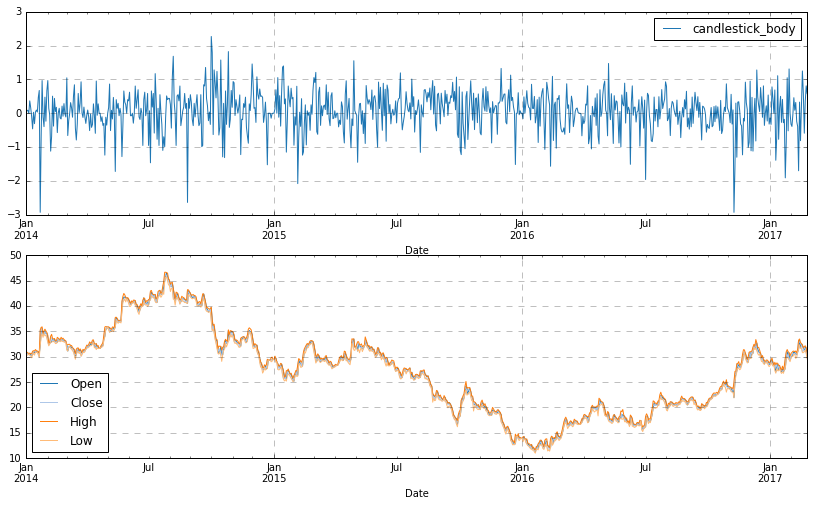

In [238]:
fig, ax = plt.subplots(2,1)
df['Spread'] = df['High'] - df['Low']
df['candlestick_body'] = df['Open'] - df['Close']
df['candlestick_body'].plot(ax=ax[0], legend=True,grid ='on')
#df['High'].plot(ax=ax[0], grid ='on', legend = True)
df[['Open','Close','High','Low']].plot(ax=ax[1], grid ='on', legend = True)
#.plot(secondary_y='volume')

### Random Forrest

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
print(df.columns)
features = ['neg_days','pos_days','over_under','pct_close_open_change']
pred_y = 'upday'

Index(['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'pct_open_close_change', 'pct_low_high_change', 'pct_open_high_change',
       'pct_close_open_change', 'pct_close_close_change',
       'pct_open_close_change_yesterday', 'rolling_20', 'rolling_40',
       'over_under', 'upday', 'pct_open_close_change_round', 'is_train',
       'neg_days', 'pos_days', 'doji', 'Spread', 'candlestick_body'],
      dtype='object')


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 823 entries, 2014-01-01 to 2017-02-24
Data columns (total 23 columns):
Adj_Close                          823 non-null float64
Close                              823 non-null float64
High                               823 non-null float64
Low                                823 non-null float64
Open                               823 non-null float64
Volume                             823 non-null float64
pct_open_close_change              823 non-null float64
pct_low_high_change                823 non-null float64
pct_open_high_change               823 non-null float64
pct_close_open_change              822 non-null float64
pct_close_close_change             822 non-null float64
pct_open_close_change_yesterday    822 non-null float64
rolling_20                         804 non-null float64
rolling_40                         784 non-null float64
over_under                         804 non-null float64
upday                              8

In [241]:
df_f = df.dropna()
train, test = df_f[df_f['is_train']==True], df_f[df_f['is_train']==False]
clf = RandomForestClassifier()
clf.fit(train[features], train[pred_y])
preds = clf.predict(test[features])
pd.crosstab(test[pred_y], preds, rownames=['actual'], colnames=['preds'])

preds   False  True 
actual              
False      86     33
True       42     35

In [242]:
rf = RandomForestRegressor()
rf.fit(train[features], train[pred_y])
print(rf.feature_importances_)
print(features)

[ 0.09317928  0.06933891  0.48811818  0.34936363]
['neg_days', 'pos_days', 'over_under', 'pct_close_open_change']


In [56]:
(~df['is_train']).sum()

85